# Forecasting with Machine Learning
### By Hannah George

## Imports

In [30]:
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib Styling options
%matplotlib inline
plt.rcParams['figure.figsize'] = (17,8)
plt.style.use('ggplot')

## The Data
The data from this project was gathered from this page: https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

### Daily Minimum Temperatures 

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


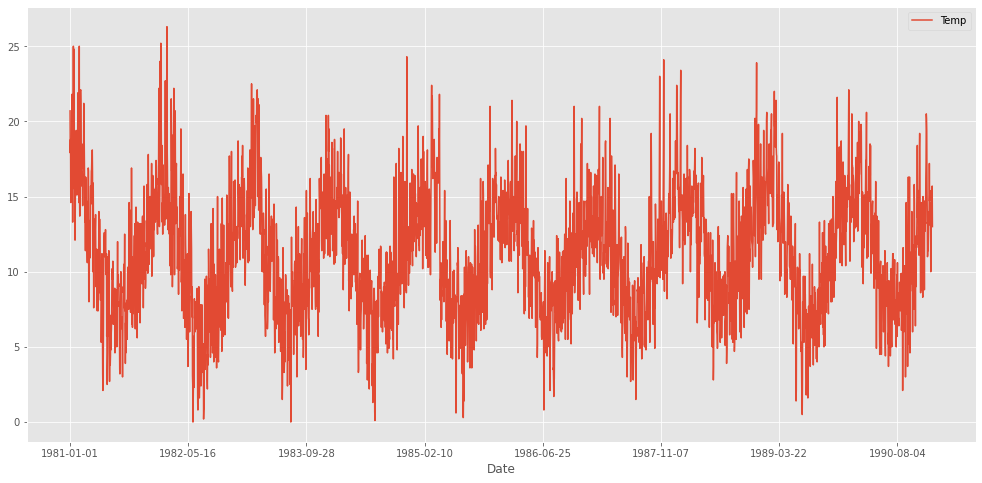

In [18]:
temp_data = pd.read_csv('Input Data/daily-min-temperatures.csv')
temp_data.plot(x='Date', y=['Temp'])
temp_data.head()

### Shampoo Sales Data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


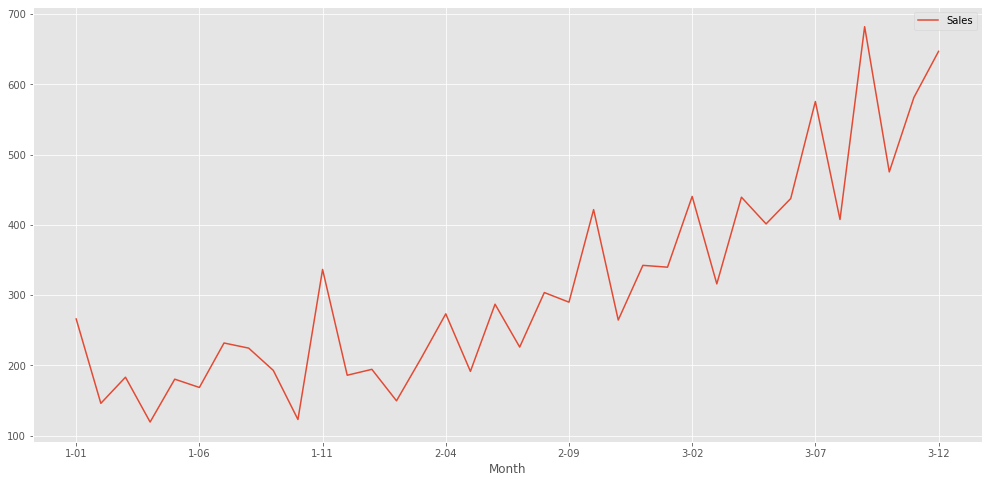

In [34]:
shampoo_data = pd.read_csv('Input Data/shampoo.csv')
shampoo_data.plot(x='Month', y='Sales')
shampoo_data.head()

## Monthly Sunspots Data

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


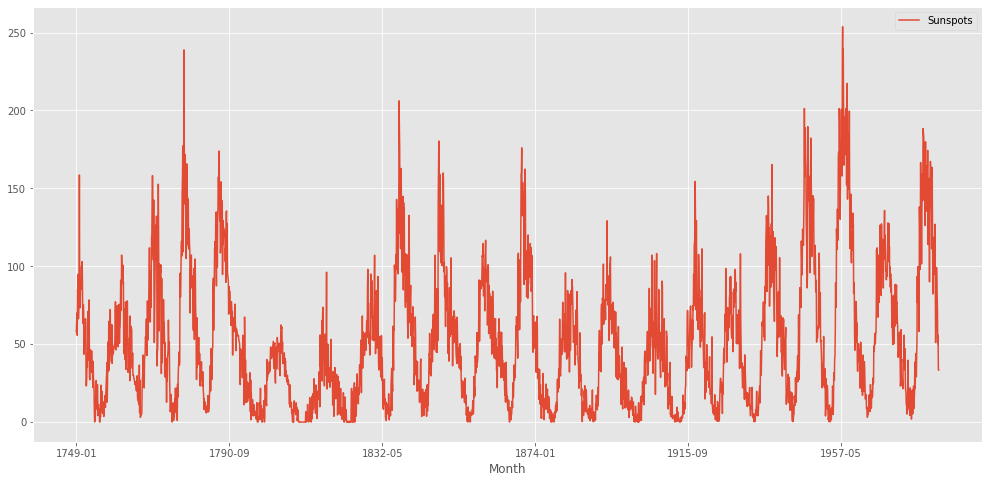

In [39]:
sunspot_data = pd.read_csv('Input Data/monthly-sunspots.csv')
sunspot_data.plot(x='Month', y='Sunspots')
sunspot_data.head()

### Daily Total Female Births

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


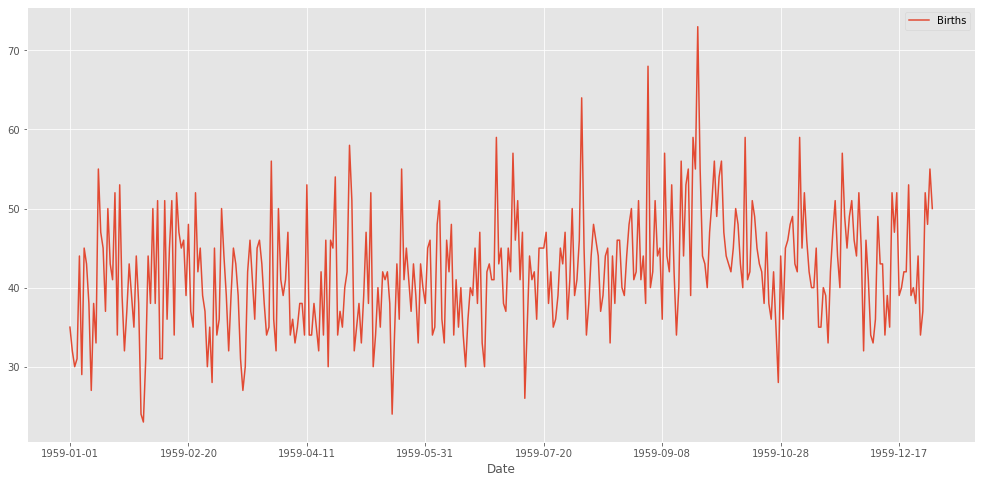

In [43]:
birth_data = pd.read_csv('Input Data/daily-total-female-births.csv')
birth_data.plot(x='Date', y='Births')
birth_data.head()

## The Model

In [7]:
class Forecast:
    
    def __init__(self):
        self.model = None
        self.input_size = None
    
    def fit(self, x: list, train_split=0.75):
        """
        Fit Linear Regression model on time series data.
        
        :param x: The time series data input.
        :param train_split: The ratio of data to be split into training.
        """
        n = len(x)
        k = round(train_split * n)
        num_rows = n - k

        x_train = [x[i:i + k] for i in range(num_rows)]
        y_train = [x[i] for i in range(k, n)]

        self.model = LinearRegression()
        self.model.fit(x_train, y_train)
        self.input_size = k
        
    def predict(self, x: list, n_periods = 12):
        """
        Predict future values from time series data.
        
        :param x: The time series data input.
        :param n_periods: The number of periods in the future you want the model to output. 
        """
        x = x[-self.input_size:]
        return self.__predict_recursive(x=x, n_periods=n_periods)
        
    def __predict_recursive(self, x: list, n_periods = 12):
        """
        Recursive helper function called on by the predict function.
        
        :param x: The time series data input.
        :param n_periods: The number of periods in the future you want the model to output. 
        """
        prediction = self.model.predict([x])[0]
        if n_periods == 1:
            return [prediction]
        else: 
            return [prediction] + self.__predict_recursive(x[1:] + [prediction], n_periods=n_periods - 1) 
        

## A Simple Test

This test is meant to see how well this model can successfully predict a simple collection of points with a clear pattern & trend.

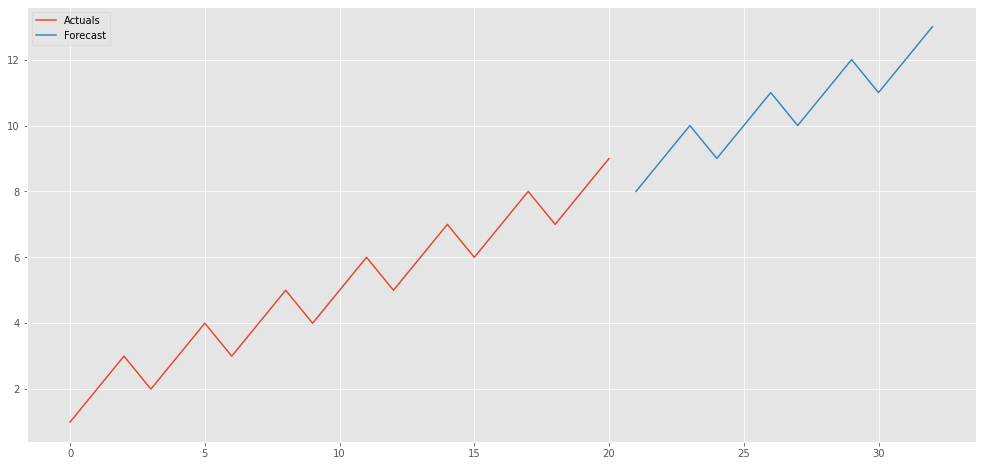

In [13]:
# Getting the forecast
x = [1,2,3,2,3,4,3,4,5,4,5,6,5,6,7,6,7,8,7,8,9]
forecast = Forecast()
forecast.fit(x)
y = forecast.predict(x)

# Plotting the results
plt_x = x + [None for i in range(len(y))]
plt_y = [None for i in range(len(x))] + y 
plt.plot(plt_x)
plt.plot(plt_y)
plt.legend(['Actuals', 'Forecast'])

## Testing on Collected Data

### Daily Minimum Temperatures

MAPE: 31.20661029827127


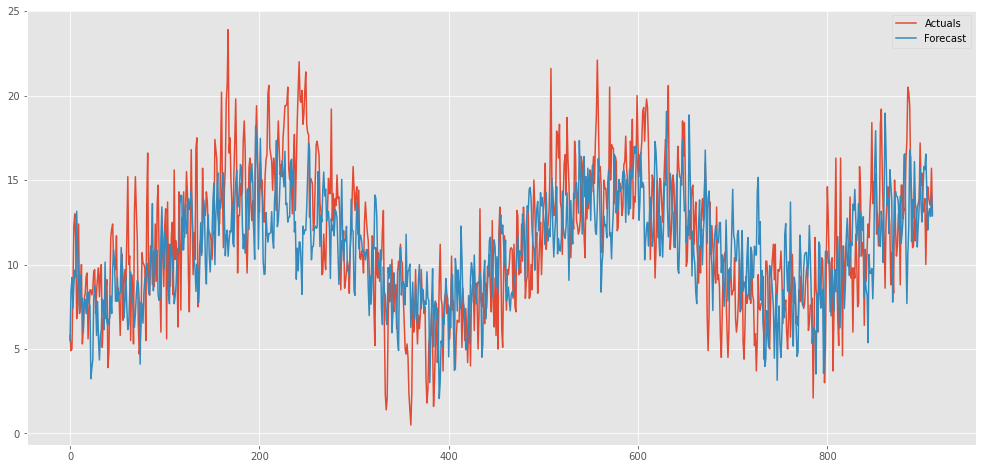

In [32]:
# Getting the forecast
n = round(len(temp_data) * 0.75)  # Reserving 25% of the data to test on
k = len(temp_data) - n 
x = temp_data['Temp'].head(n).to_list()
forecast = Forecast()
forecast.fit(x)
y_pred = forecast.predict(x, n_periods=k)

# Plotting the results
y_true = temp_data['Temp'].tail(k).to_list()
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(['Actuals', 'Forecast'])

# Measuring the accuracy
mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
print(f'MAPE: {mape}')

### Shampoo Sales Data

MAPE: 25.568724124868957


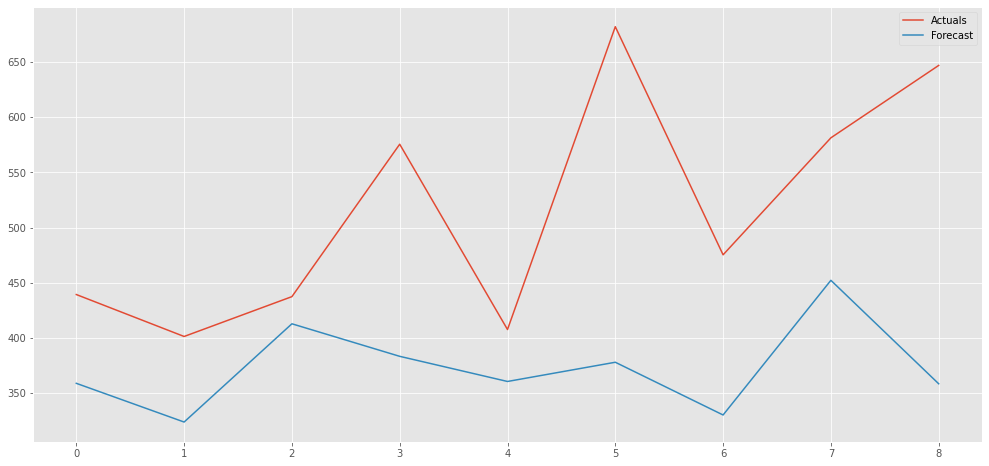

In [37]:
# Getting the forecast
n = round(len(shampoo_data) * 0.75)  # Reserving 25% of the data to test on
k = len(shampoo_data) - n 
x = shampoo_data['Sales'].head(n).to_list()
forecast = Forecast()
forecast.fit(x)
y_pred = forecast.predict(x, n_periods=k)

# Plotting the results
y_true = shampoo_data['Sales'].tail(k).to_list()
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(['Actuals', 'Forecast'])

# Measuring the accuracy
mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
print(f'MAPE: {mape}')

### Sunspots Data

MAPE: 256.7753895395948


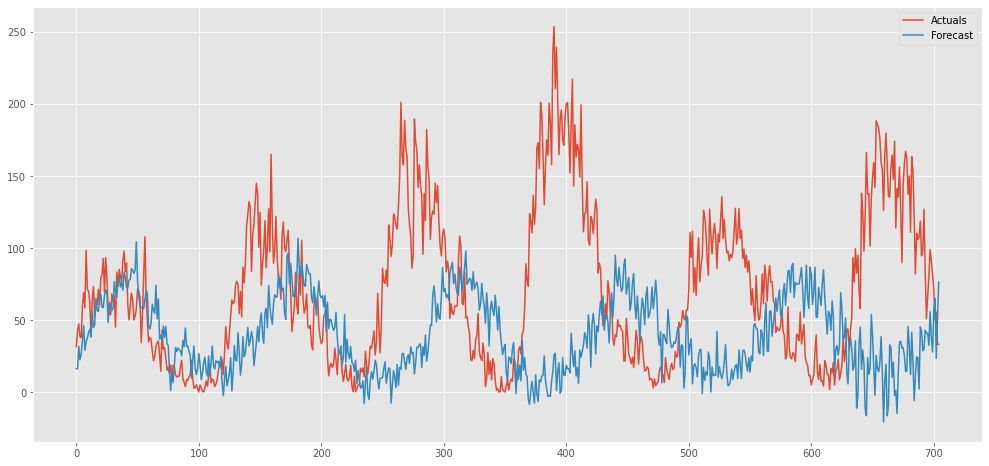

In [41]:
# Getting the forecast
n = round(len(sunspot_data) * 0.75)  # Reserving 25% of the data to test on
k = len(sunspot_data) - n 
x = sunspot_data['Sunspots'].head(n).to_list()
forecast = Forecast()
forecast.fit(x)
y_pred = forecast.predict(x, n_periods=k)

# Plotting the results
y_true = sunspot_data['Sunspots'].tail(k).to_list()
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(['Actuals', 'Forecast'])

# Measuring the accuracy
mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
print(f'MAPE: {mape}')

### Daily Total Female Births Data

MAPE: 56.76729441413788


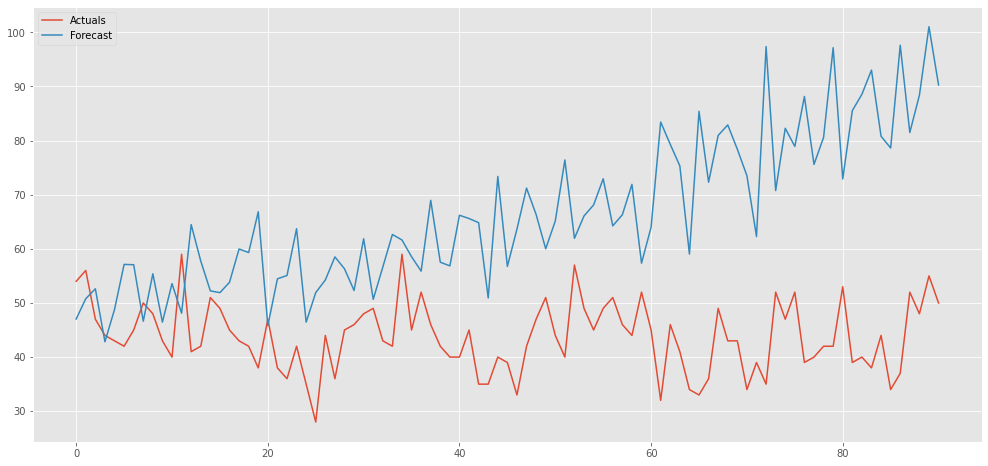

In [44]:
# Getting the forecast
n = round(len(birth_data) * 0.75)  # Reserving 25% of the data to test on
k = len(birth_data) - n 
x = birth_data['Births'].head(n).to_list()
forecast = Forecast()
forecast.fit(x)
y_pred = forecast.predict(x, n_periods=k)

# Plotting the results
y_true = birth_data['Births'].tail(k).to_list()
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(['Actuals', 'Forecast'])

# Measuring the accuracy
mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
print(f'MAPE: {mape}')